# AOD

## langley calibration

### load calibration

In [22]:
import helpers

In [23]:
import atmPy.radiation.retrievals.langley_calibration as atmlc

<xarray.Dataset> Size: 168B
Dimensions:     (wavelength: 6)
Coordinates:
  * wavelength  (wavelength) int32 24B 415 500 670 870 940 1625
Data variables:
    V0          (wavelength) float64 48B 7.886 7.241 6.655 7.509 7.718 6.219
    V0_std      (wavelength) float64 48B 0.0 0.0 0.0 0.0 0.0 0.0
    V0_stderr   (wavelength) float64 48B 0.001221 0.001247 ... 0.001458 0.001511

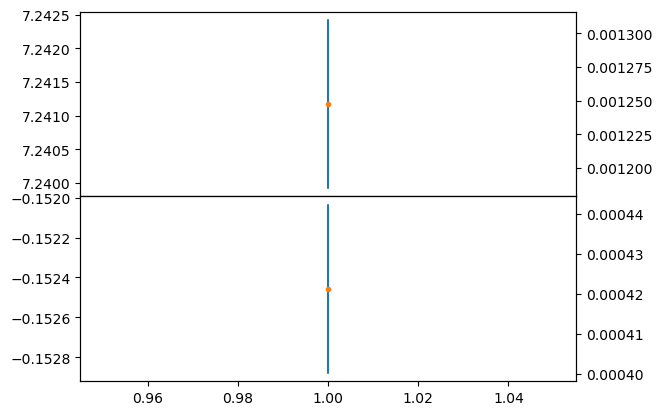

In [24]:
p2fld = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.2/')
lt = atmlc.open_langleys(p2fld)
lt648 = lt
lt.plot_ranked(wl = 500)
lt.V0_simple

<xarray.Dataset> Size: 168B
Dimensions:     (wavelength: 6)
Coordinates:
  * wavelength  (wavelength) int32 24B 415 500 670 870 940 1625
Data variables:
    V0          (wavelength) float64 48B 7.988 7.233 6.776 7.615 7.787 6.255
    V0_std      (wavelength) float64 48B 0.003772 0.0007407 ... 0.05823 0.006433
    V0_stderr   (wavelength) float64 48B 0.001153 0.001047 ... 0.001746 0.001725

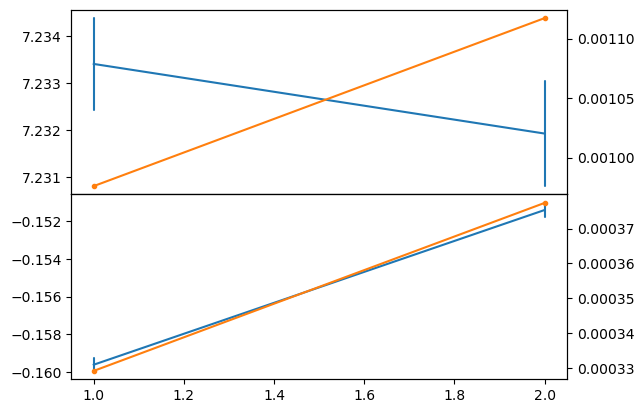

In [25]:
p2fld = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.2/')
lt = atmlc.open_langleys(p2fld)
lt649 = lt
lt.plot_ranked(wl = 500)
lt.V0_simple

### Load a file

## calibrate to irradiance

### what should the TOA irradiance be at that day, actually so the earth-sun distance is in full disply 

In [26]:
import atmPy.radiation.retrievals.spectral_irradiance as atmspec

In [27]:
reload(atmspec)

<module 'atmPy.radiation.retrievals.spectral_irradiance' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py'>

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = da

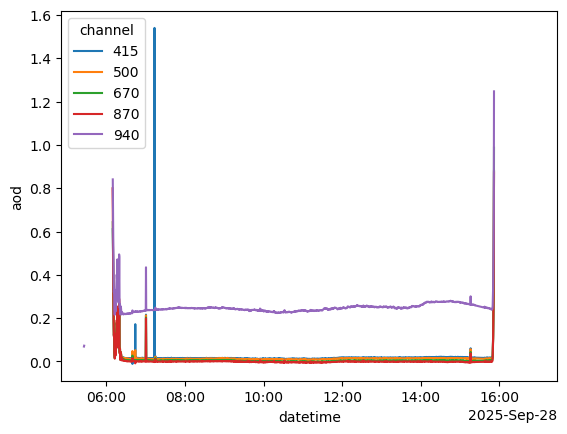

In [28]:
fn = '/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250928.nc'
fnmet = '/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250928_preliminary.nc'
ds = xr.open_dataset(fn)

gdd = atmspec.CombinedGlobalDiffuseDirect(ds.copy())
gdd.dataset['channel_wavelength'] = gdd.dataset.channel_wavelength.astype(float) #error in processing upstream, fix it in future versions!

gdd = gdd.apply_calibration_langley(lt648)

dni = gdd.direct_normal_irradiation
dni.raw_data = dni.raw_data.where(dni.raw_data.channel < 1000, drop = True)
dni.met_data = fnmet
dni.ozone_data = 300
dni.aod.plot.line(x = 'datetime')
dni648 = dni

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = da

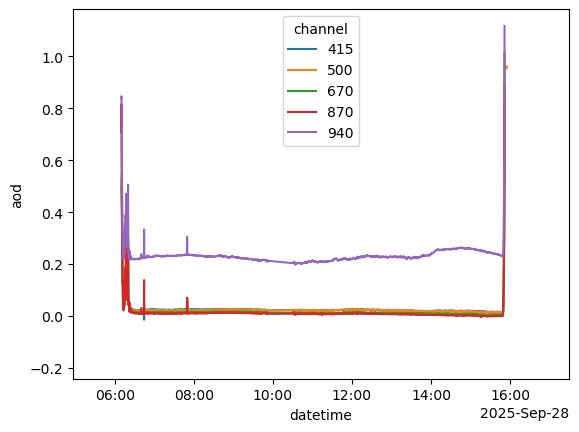

In [29]:
fn = '/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250928.nc'
fnmet = '/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250928_preliminary.nc'
ds = xr.open_dataset(fn)

gdd = atmspec.CombinedGlobalDiffuseDirect(ds.copy())
gdd.dataset['channel_wavelength'] = gdd.dataset.channel_wavelength.astype(float) #error in processing upstream, fix it in future versions!

gdd = gdd.apply_calibration_langley(lt649)

dni = gdd.direct_normal_irradiation
dni.raw_data = dni.raw_data.where(dni.raw_data.channel < 1000, drop = True)
dni.met_data = fnmet
dni.ozone_data = 300
dni.aod.plot.line(x = 'datetime')
dni649 = dni

## compare to others

In [30]:
p2fld = pl.Path('/nfs/grad/campaign/frc/2025/AOD/')

In [31]:
list(p2fld.glob('**/*'))

[PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_PTB_CAS'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/US_NOAA_HSR1'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_AEMET_CE'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/FR_LOA.UoL_CE'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_PTB_SSIM'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_UVa_MTS'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_PTB_CAS-IR'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/SE_SMHI_PFR'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_UV_POM'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/JP_JMA_POM'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_CIEMAT_BTS'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_DWD_PFR-F'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/CN_CMA_CW193'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/US_NOAA_MFR#8'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/US_NOAA_MFR#9'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_AEMET_CLT'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_

In [32]:
import helpers

In [33]:
reload(helpers)

<module 'helpers' from '/home/hagen/projecte/cmpaign_2025_PMOD/helpers.py'>

In [34]:
p2f = pl.Path('/nfs/grad/campaign/frc/2025/AOD/JP_JMA_POM/JP_JMA_POM_20250928.aod')
ds = helpers.read_JP_JMA_POM(p2f)
ds_jp_jma_pom = ds
ds

<xarray.Dataset> Size: 47kB
Dimensions:   (datetime: 530, channel: 10)
Coordinates:
  * datetime  (datetime) datetime64[ns] 4kB 2025-09-28T06:31:00 ... 2025-09-2...
  * channel   (channel) int64 80B 340 380 400 500 675 870 1020 1225 1627 2200
Data variables:
    aod       (datetime, channel) float64 42kB 0.0352 0.035 ... 0.0065 0.0425

(-0.01, 0.05)

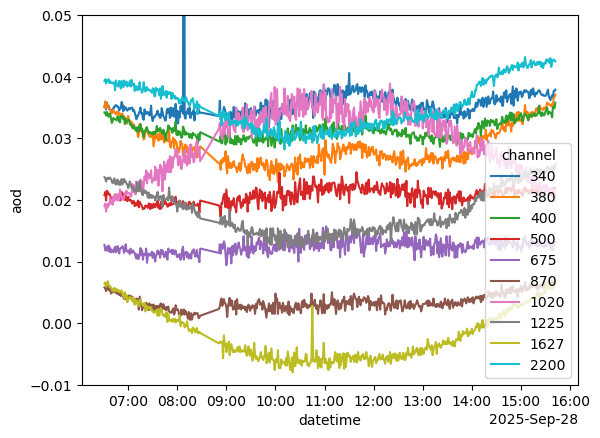

In [35]:
f,a = plt.subplots()
ds_jp_jma_pom.aod.plot.line(x = 'datetime')
a.set_ylim(-0.01,0.05)

In [36]:
p2f = pl.Path('/nfs/grad/campaign/frc/2025/AOD/SE_SMHI_PFR/SE_SMHI_PFR_20250928.aod')
ds = helpers.read_SE_SMHI_PFR(p2f)
ds_se_smhi_pfr = ds

(-0.01, 0.05)

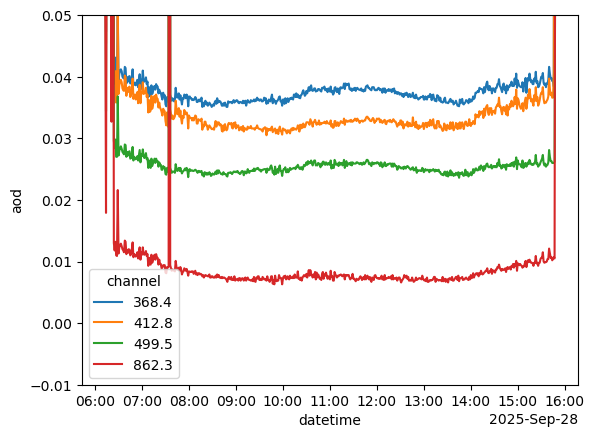

In [37]:
f,a = plt.subplots()
ds.aod.plot.line(x = 'datetime', ax = a)
a.set_ylim(-0.01, 0.05)

In [38]:
ds_jp_jma_pom.channel

<xarray.DataArray 'channel' (channel: 10)> Size: 80B
array([ 340,  380,  400,  500,  675,  870, 1020, 1225, 1627, 2200])
Coordinates:
  * channel  (channel) int64 80B 340 380 400 500 675 870 1020 1225 1627 2200

In [39]:
ds_se_smhi_pfr.channel

<xarray.DataArray 'channel' (channel: 4)> Size: 32B
array([368.4, 412.8, 499.5, 862.3])
Coordinates:
  * channel  (channel) float64 32B 368.4 412.8 499.5 862.3

(-0.01, 0.04)

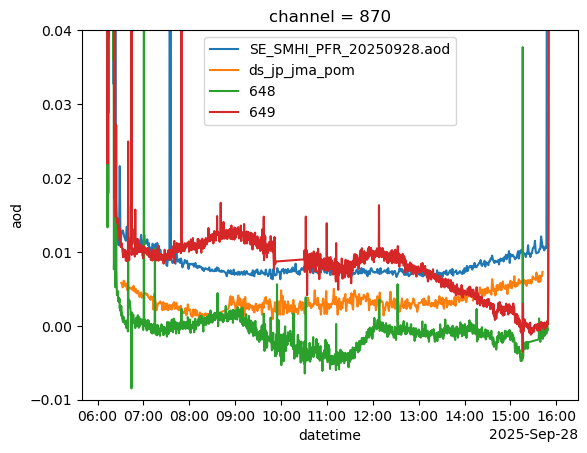

In [40]:
f,a = plt.subplots()
ds_se_smhi_pfr.aod.sel(channel = 862.3).plot(ax = a, label = p2f.name)
ds_jp_jma_pom.aod.sel(channel = 870).plot(ax = a, label = 'ds_jp_jma_pom')
dni648.aod.sel(channel = 870).plot(ax = a, label = '648')
dni649.aod.sel(channel = 870).plot(ax = a, label = '649')

a.legend()
a.set_ylim(-0.01, 0.04)

(-0.01, 0.04)

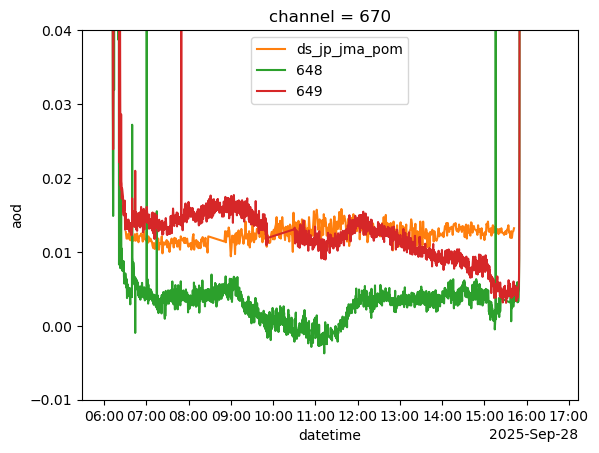

In [48]:
f,a = plt.subplots()
# ds_se_smhi_pfr.aod.sel(channel = 862.3).plot(ax = a, label = p2f.name)
a._get_lines.get_next_color()
ds_jp_jma_pom.aod.sel(channel = 675).plot(ax = a, label = 'ds_jp_jma_pom')
dni648.aod.sel(channel = 670).plot(ax = a, label = '648')
dni649.aod.sel(channel = 670).plot(ax = a, label = '649')

a.legend()
a.set_ylim(-0.01, 0.04)

(-0.01, 0.04)

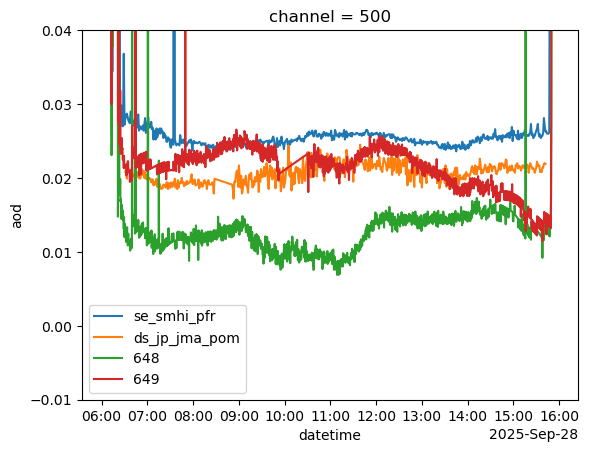

In [41]:
f,a = plt.subplots()
ds_se_smhi_pfr.aod.sel(channel = 499.5).plot(ax = a, label = 'se_smhi_pfr')
ds_jp_jma_pom.aod.sel(channel = 500).plot(ax = a, label = 'ds_jp_jma_pom')
dni648.aod.sel(channel = 500).plot(ax = a, label = '648')
dni649.aod.sel(channel = 500).plot(ax = a, label = '649')
a.legend()
a.set_ylim(-0.01, 0.04)

(-0.01, 0.04)

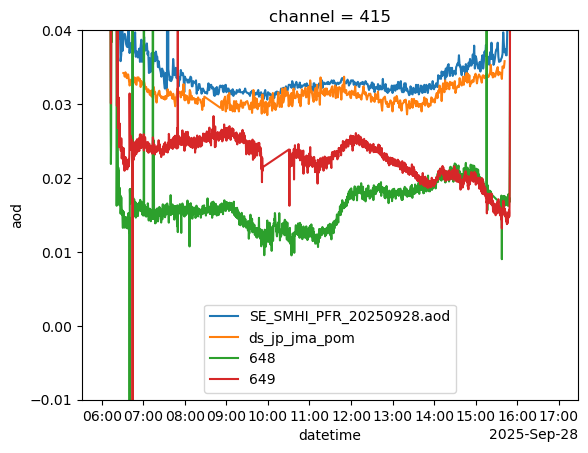

In [42]:
f,a = plt.subplots()#, gridspec_kw={'hspace': 0})
# a = aa[0]
ds_se_smhi_pfr.aod.sel(channel = 412.8).plot(ax = a, label = p2f.name)
ds_jp_jma_pom.aod.sel(channel = 400).plot(ax = a, label = 'ds_jp_jma_pom')
dni648.aod.sel(channel = 415).plot(ax = a, label = '648')
dni649.aod.sel(channel = 415).plot(ax = a, label = '649')

a.legend()
a.set_ylim(-0.01, 0.04)



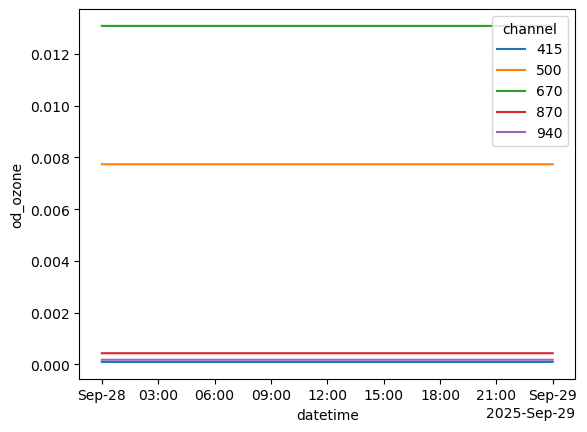

In [43]:
dni648.od_ozone.plot.line(x = 'datetime')